# Color Threshold, Blue Screen

### Import resources

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [3]:
# Read in the image
image = cv2.imread('images/pizza_bluescreen.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)


This image is: <class 'numpy.ndarray'>  with dimensions: (514, 816, 3)


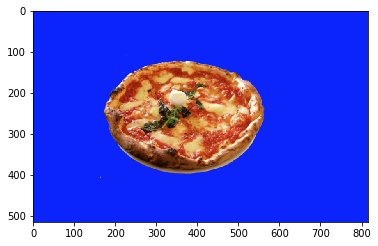

In [4]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)


### Define the color threshold

In [8]:
## TODO: Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background
lower_blue = np.array([0,0,220]) 
upper_blue = np.array([50,50,255])


### Create a mask

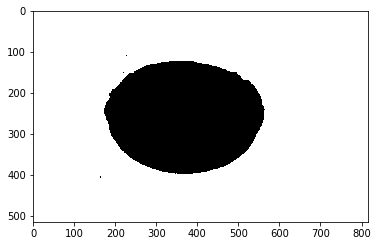

In [9]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

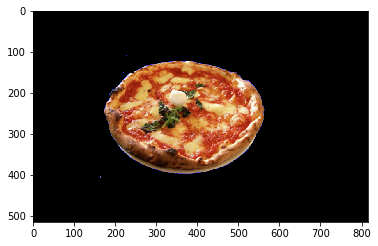

In [10]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

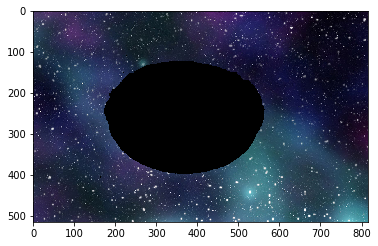

In [11]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
crop_background = background_image[0:514, 0:816]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

### Create a complete image

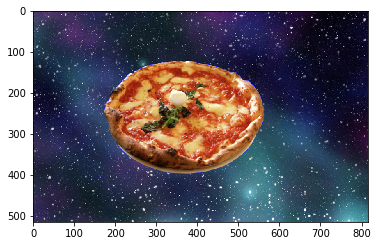

In [12]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)

<hr>

### DIY

Image dimensions: (531, 413, 3)


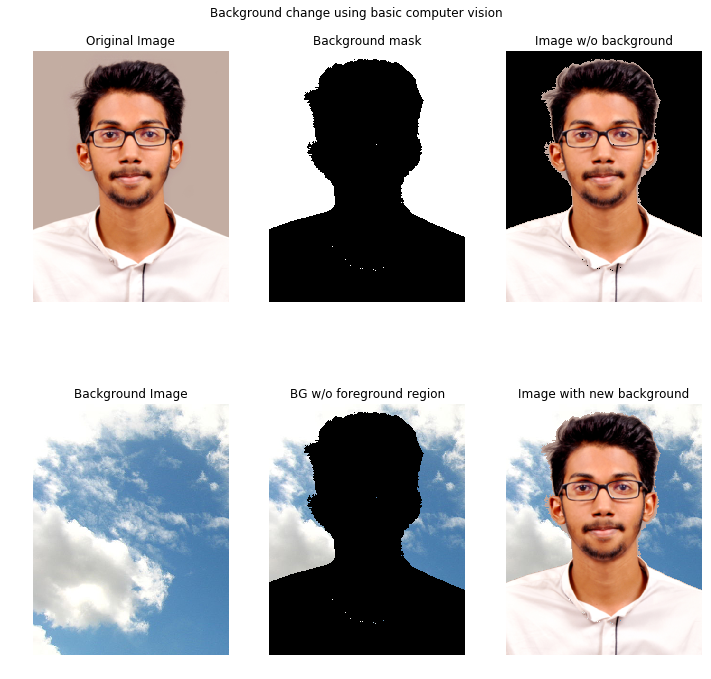

In [159]:
# import the image
image1 = cv2.imread("../img/nabhan1.jpg")

# print out the image details
print(f"Image dimensions: {image1.shape}")

# make an image copy
image_copy1 = np.copy(image1)
# convert to RGB
image_copy1 = cv2.cvtColor(image_copy1, cv2.COLOR_BGR2RGB)
image_copy1 = cv2.GaussianBlur(image_copy1, ksize=(3, 3), sigmaX=1)


fig, ax = plt.subplots(2, 3, figsize=(10, 10))
plt.suptitle("Background change using basic computer vision")
# flatten the ax array and map to turn off axis
[axi.axis('off') for axi in ax.ravel()]

# show original image
ax[0, 0].imshow(image1_copy);
ax[0, 0].set_title('Original Image')


# create mask
# avg - [195, 173, 162]
lower_bound = np.array([190, 168, 157])
upper_bound = np.array([200, 178, 167])

mask = cv2.inRange(image_copy1, lower_bound, upper_bound)
# mask = cv2.GaussianBlur(mask, ksize=(3, 3), sigmaX=11)

ax[0, 1].imshow(mask, cmap='gray');
ax[0, 1].set_title('Background mask')


# segregate out background from original image

masked_image1 = np.copy(image1_copy)

# black out background in original image
masked_image1[mask != 0] = [0, 0, 0]

ax[0, 2].imshow(masked_image1);
ax[0, 2].set_title('Image w/o background')


# process background image
background_image1 = cv2.imread("images/sky.jpg")
background_image1 = cv2.cvtColor(background_image1, cv2.COLOR_BGR2RGB)

crop_background1 = background_image1[:image1.shape[0], :image1.shape[1]]

ax[1, 0].imshow(crop_background1);
ax[1, 0].set_title('Background Image')

crop_background1[mask == 0] = [0, 0, 0]

ax[1, 1].imshow(crop_background1);
ax[1, 1].set_title('BG w/o foreground region')


# layer images
complete_image = masked_image1 + crop_background1

ax[1, 2].imshow(complete_image)
ax[1, 2].set_title('Image with new background');

plt.tight_layout()
fig.savefig('images/output/nabhan1-sky.jpg')

### Create a function

In [285]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# init subplot
def get_subplots(row, col, title=''):
    fig, ax = plt.subplots(row, col, figsize=(10, 6))
    
    plt.suptitle(title)
    
    # flatten the ax array and map to turn off axis
    [axi.axis('off') for axi in ax.ravel()]

    return fig, ax

# show image
def imshow(img, axis, title=''):
    axis.imshow(img)
    axis.set_title(title)
    
    
# read and crop  image
def imread(path, axis=None, shape=(), title='', display=True):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if shape:
        # crop image
        img = cv2.resize(img, (shape[1], shape[0]))
    
    if axis:
        axis.imshow(img)
        axis.set_title(title)
    elif display == True:
        plt.imshow(img)
        plt.title(title)
        
    return img


def create_mask(img, lower_bound, upper_bound, axis, title=''):
    lower_bound = np.array(lower_bound)
    upper_bound = np.array(upper_bound)
    
    mask = cv2.inRange(img, lower_bound, upper_bound)

    axis.imshow(mask, cmap='gray')
    axis.set_title(title)
    
    return mask


# mask image
def mask_image(img, mask, axis, flag=0, title=''):    
    if flag == 0:
        img[mask == 0] = [0, 0, 0]
    else:
        img[mask != 0] = [0, 0, 0]

    axis.imshow(img)
    axis.set_title(title)
    
    return img


# return sum of all images added 
def add_images(images, axis, title='Image with new background'):
    complete_image = np.sum(images, axis=0)
    
    axis.imshow(complete_image)
    axis.set_title(title)
    
    return complete_image

# change bg
def background_change(ori_path, bg_path, lower_bound, upper_bound, save_as):
    fig, ax = get_subplots(2, 3, title="Background change using basic image processing")

    # show original image
    img = imread(ori_path, ax[0, 0], title='Original Image')
    img = cv2.GaussianBlur(img, ksize=(3, 3), sigmaX=1)


    # create mask
    mask = create_mask(img, lower_bound, upper_bound, ax[0, 1], title='Background mask')

    # segregate out background from original image
    masked_image = mask_image(img, mask, ax[0, 2], flag=1, title='Image w/o background')

    # read and process background image
    crop_background = imread(bg_path, ax[1, 0], shape=img.shape, title='Background Image')
    background_masked = mask_image(crop_background, mask, ax[1, 1], flag=0, title='BG w/o foreground region')

    completed_image = add_images([masked_image, crop_background], ax[1, 2], title='Image with new background')

    # plt.tight_layout()
    if save_as != '':
        fig.savefig(save_as)

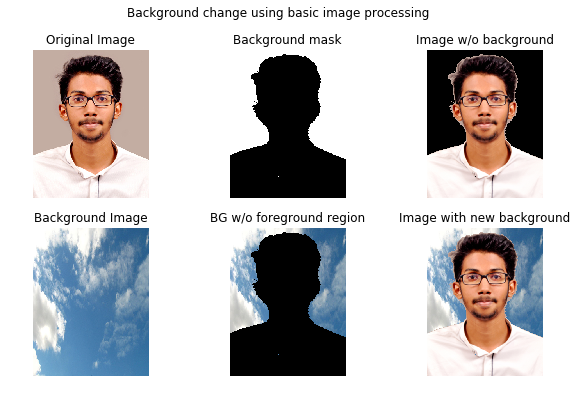

In [286]:
lower_bound = np.array([190, 168, 157])
upper_bound = np.array([200, 178, 167])

background_change('../img/nabhan1.jpg', 'images/sky.jpg', lower_bound, upper_bound,
                 'images/output/nabhan1-sky.jpg')

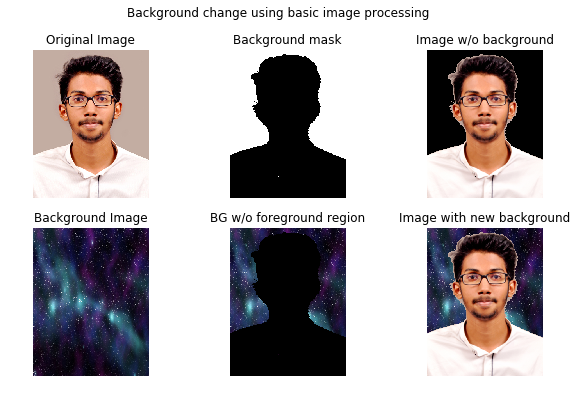

In [287]:
background_change('../img/nabhan1.jpg', 'images/space_background.jpg', 
                  lower_bound, upper_bound, 'images/output/nabhan1-space.jpg')